In [2]:
import pandas as pd
from copy import deepcopy
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

# plt.switch_backend('Qt5Agg')
# %matplotlib

# plt.rcParams['figure.figsize'] = [20, 10]
# font = {'weight' : 'normal',
#         'size'   : 24}
# dpi = 300
# matplotlib.rc('font', **font)

def ci(data):
    sdata = sorted(data.dropna())
    n = len(sdata)
    # z = 1.96 # 95%
    z = 2.576 # 99%
    # z = 3.291 # 99.9%
    lower_pos = math.floor((n - z*math.sqrt(n))/2)
    upper_pos = math.ceil(1 + (n + z*math.sqrt(n))/2)
    return sdata[lower_pos-1], sdata[upper_pos-1]

def calculate_ci(df):
    cols_to_use = [i for i in range(1, 20)]
    df['min_time']    = df.loc[:, cols_to_use].min(axis=1, skipna=True)
    df['max_time']    = df.loc[:, cols_to_use].max(axis=1, skipna=True)
    df['median_time'] = df.loc[:, cols_to_use].median(axis=1, skipna=True)
    df['mean_time']   = df.loc[:, cols_to_use].mean(axis=1, skipna=True)
    df['std_time']    = df.loc[:, cols_to_use].std(axis=1, skipna=True)
    
    df['ci']               = df.loc[:, cols_to_use].apply(lambda x: ci(x), axis=1)
    df[['cimin', 'cimax']] = pd.DataFrame(df['ci'].tolist(), index=df.index)
    df['cimin_p']          = df['cimin']    / df['median_time']
    df['cimax_p']          = df['cimax']    / df['median_time']
    
    return df


In [17]:
threads = 1
df_m = pd.read_csv('../results/matlab_{}.txt'.format(threads), delimiter='\t')
df_j = pd.read_csv('../results/julia_{}.txt'.format(threads), delimiter=';')
df_c = pd.read_csv('../results/c_{}.txt'.format(threads), delimiter=';')
df_cppa = pd.read_csv('../results/armadillo_{}.txt'.format(threads), delimiter=';')
df_cppe = pd.read_csv('../results/eigen_{}.txt'.format(threads), delimiter=';')
df_py = pd.read_csv('../results/python_{}.txt'.format(threads), delimiter=';')
df_r = pd.read_csv('../results/R_{}.txt'.format(threads), delimiter=';')
df_o = pd.read_csv('../results/octave_{}.txt'.format(threads), delimiter=';')
# df_temp['algorithm'] = df_temp['algorithm'].apply(lambda x: x.split('_')[0]+'_implicit')
# df_c = df_c.append(df_temp, ignore_index=True)

df_merged = pd.merge(df_m[['algorithm', 'Min']], df_j[['algorithm','Julia']], on='algorithm', how='outer')
df_merged.rename(columns={'Min': 'Matlab'}, inplace=True)

df_merged = pd.merge(df_merged, df_c[['algorithm','C']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_cppa[['algorithm','Armadillo']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_cppe[['algorithm','Eigen']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_py[['algorithm','Python']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_r[['algorithm','R']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_o[['algorithm','Min']], on='algorithm', how='outer')
df_merged.rename(columns={'Min': 'Octave'}, inplace=True)
df_merged.rename(columns={'Armadillo': 'Arma'}, inplace=True)

df_merged = df_merged.reindex(columns=['algorithm', 'C', 'Arma', 'Eigen', 'Julia', 'Matlab', 'Python', 'Octave', 'R'])
# df_merged
# df_merged.sort_values('algorithm').reset_index(drop=True)

In [18]:
df_j_t = pd.read_csv('../results/julia_{}_timings.txt'.format(threads), delimiter=';', header=None)
df_m_t = pd.read_csv('../results/matlab_{}_timings.txt'.format(threads), delimiter='\t', header=None, skiprows=1)
df_cppa_t = pd.read_csv('../results/armadillo_{}_timings.txt'.format(threads), delimiter=';', header=None)
df_cppe_t = pd.read_csv('../results/eigen_{}_timings.txt'.format(threads), delimiter=';', header=None)
df_py_t = pd.read_csv('../results/python_{}_timings.txt'.format(threads), delimiter=';', header=None)
df_r_t = pd.read_csv('../results/R_{}_timings.txt'.format(threads), delimiter=';', header=None)
# print(df_merged.reset_index(drop=True).replace(np.NaN, '-'))

In [19]:
keywords = ['solve_spd', 'solve_sym', 'solve_tri', 'solve_dia']
df_merged[df_merged['algorithm'].isin(keywords)].round(4).reset_index(drop=True)

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
0,solve_spd,0.3185,0.3672,0.6124,0.6019,0.4086,0.6284,0.4175,0.6539
1,solve_sym,0.4654,0.6271,0.6377,0.6262,0.7147,0.6535,0.7233,0.6801
2,solve_tri,0.0305,0.0640,0.6378,0.0360,0.0358,0.6537,0.0449,0.6459
3,solve_dia,0.0012,0.0409,0.6114,0.0135,0.0357,0.6284,0.0517,0.6374


In [20]:
keywords = ['solve_nai', 'solve_rec']
df_merged[df_merged['algorithm'].isin(keywords)].round(2).reset_index(drop=True)

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
0,solve_nai,1.71,0.63,2.21,1.69,1.76,2.23,1.82,2.20
1,solve_rec,0.61,0.63,0.64,0.63,0.71,0.65,0.72,0.68


In [21]:
keywords = ['gemm_explicit', 'gemm_implicit_noup', 'gemm_implicit', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff', 'gemm_implicit_compact']
df_merged[df_merged['algorithm'].isin(keywords)].round(3).reset_index(drop=True).replace(np.NaN, '-')

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
0,gemm_implicit,0.268,0.288,0.293,0.304,0.288,0.292,0.313,0.309
1,gemm_implicit_noup,0.269,0.262,0.292,0.275,0.275,0.280,0.284,0.28
2,gemm_implicit_coeff,-,0.288,0.292,0.307,0.292,0.298,0.315,0.319
3,gemm_implicit_double_coeff,-,0.289,0.292,0.331,0.292,0.322,0.339,0.327
4,gemm_implicit_compact,-,0.262,0.292,0.304,-,0.292,0.313,-
5,gemm_explicit,0.268,-,-,0.262,-,0.277,-,-


In [22]:
keywords = ['syrk_implicit', 'syrk_implicit_noup', 'syrk_explicit_noup', 'syrk_implicit_compact', 'syrk_explicit', 'syrk_implicit_compact', 'gemm_explicit']
df_merged[df_merged['algorithm'].isin(keywords)].round(3).reset_index(drop=True).replace(np.NaN, '-')

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
0,syrk_implicit,-,0.173,0.294,0.203,0.179,0.183,0.199,0.315
1,syrk_implicit_noup,-,0.146,0.293,0.160,0.165,0.169,0.169,0.285
2,syrk_implicit_compact,-,0.173,0.293,0.211,-,0.182,0.199,-
3,syrk_explicit,0.137,-,-,0.134,-,0.142,-,-
4,syrk_explicit_noup,0.137,-,-,0.134,-,-,-,-
5,gemm_explicit,0.268,-,-,0.262,-,0.277,-,-


In [23]:
keywords = ['syr2k_implicit', 'syr2k_implicit_noup', 'syr2k_explicit_noup','syr2k_implicit_compact', 'syr2k_explicit', 'syr2k_implicit_compact', 'gemm_explicit']
df_merged[df_merged['algorithm'].isin(keywords)].round(2).reset_index(drop=True).replace(np.NaN, '-')

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
0,syr2k_implicit,-,0.57,0.58,0.62,0.57,0.58,0.63,0.58
1,syr2k_implicit_noup,-,0.57,0.56,0.58,0.57,0.57,0.6,0.56
2,gemm_explicit,0.27,-,-,0.26,-,0.28,-,-
3,syr2k_implicit_compact,-,0.57,0.56,0.63,-,0.58,0.63,-
4,syr2k_explicit,0.28,-,-,0.27,-,0.28,-,-
5,syr2k_explicit_noup,0.28,-,-,0.27,-,-,-,-


In [24]:
keywords = ['trmm_implicit', 'gemm_explicit_large', 'trmm_explicit', 'trmm_implicit_compact', 'diagmm']
df_merged[df_merged['algorithm'].isin(keywords)].round(2).reset_index(drop=True).replace(np.NaN, '-')

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
0,trmm_implicit,0.75,1.44,1.46,1.44,1.44,1.45,1.48,1.47
1,diagmm,0.06,1.43,1.46,1.44,1.44,1.45,1.48,1.47
2,trmm_implicit_compact,-,1.44,1.46,1.44,-,-,-,-
3,trmm_explicit,0.75,-,-,0.73,-,0.76,-,-
4,gemm_explicit_large,1.46,-,-,-,-,-,-,-


In [25]:
keywords = ['mc_l_r_orig', 'mc_l_r_guid', 'mc_r_l_orig', 'mc_r_l_guid', 'mc_mixed_orig', 'mc_mixed_guid']
df_merged[df_merged['algorithm'].isin(keywords)].round(2).set_index(['algorithm']).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
mc_l_r_orig,-,0.06,0.06,0.06,0.06,0.06,0.06,0.06
mc_l_r_guid,-,0.06,0.06,0.06,0.06,0.06,0.06,0.06
mc_r_l_orig,-,0.06,0.43,0.42,0.42,0.43,0.43,0.43
mc_r_l_guid,-,0.06,0.06,0.05,0.05,0.06,0.06,0.06
mc_mixed_orig,-,0.32,0.35,0.33,0.33,0.34,0.34,0.32
mc_mixed_guid,0.21,0.21,0.24,0.22,0.22,0.22,0.22,0.22


In [26]:
keywords = ['subexpr_nai', 'subexpr_rec']
df_merged[df_merged['algorithm'].isin(keywords)].round(2)

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
21,subexpr_nai,0.55,0.57,0.56,0.58,0.56,0.57,0.60,0.58
22,subexpr_rec,0.28,0.27,0.30,0.30,0.28,0.30,0.31,0.30


In [27]:
keywords = ['loop_nai', 'loop_rec']
df_merged[df_merged['algorithm'].isin(keywords)].round(5).reset_index(drop=True).replace(np.NaN, '-')

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
0,loop_nai,-,0.00268,0.00315,0.00280,0.0028,0.00318,0.00489,0.00465
1,loop_rec,-,0.00006,0.00006,0.00008,0.0001,0.00012,0.00104,0.00013


In [28]:
keywords = ['compact', 'blocked']
df_merged[df_merged['algorithm'].isin(keywords)].round(2).reset_index(drop=True).replace(np.NaN, '-')

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
0,compact,-,2.06,2.13,2.08,2.17,2.24,2.23,2.18
1,blocked,-,0.97,0.98,0.97,1.01,1.06,1.06,1.02


In [29]:
keywords = ['add', 'scal']
df_merged[df_merged['algorithm'].isin(keywords)].round(2).reset_index(drop=True).replace(np.NaN, '-')

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
0,add,-,0.01,0.01,0.03,0.03,0.03,0.03,0.03
1,scal,-,0.01,0.01,0.02,0.02,0.02,0.02,0.02


In [30]:
keywords = ['tr_nn_implicit', 'tr_nt_implicit', 'tr_tn_implicit', 'tr_tt_implicit', 'tr_nn_explicit', 'tr_nt_explicit', 'tr_tn_explicit', 'tr_tt_explicit']
df_merged[df_merged['algorithm'].isin(keywords)].round(6).reset_index(drop=True).replace(np.NaN, '-')

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
0,tr_nn_implicit,-,5.3e-05,6.6e-05,0.000082,9.1e-05,0.000089,0.000108,0.000112
1,tr_tn_implicit,-,5.3e-05,6.6e-05,0.000082,9.1e-05,0.000092,0.000109,0.000136
2,tr_nt_implicit,-,5.3e-05,6.7e-05,0.000085,9.3e-05,0.000093,0.000109,0.000136
3,tr_tt_implicit,-,5.4e-05,6.7e-05,0.000084,9.3e-05,0.000095,0.000142,0.000155
4,tr_nn_explicit,5.4e-05,-,-,0.000076,-,0.000114,-,-
5,tr_tn_explicit,5.5e-05,-,-,0.000076,-,0.000113,-,-
6,tr_nt_explicit,5.5e-05,-,-,0.000078,-,0.000112,-,-
7,tr_tt_explicit,5.6e-05,-,-,0.000077,-,0.000114,-,-


In [31]:
keywords = ['diagmm', 'diag_add_nai', 'diag_add_rec', 'diag_mult_nai', 'gemm_explicit_large']
df_merged[df_merged['algorithm'].isin(keywords)].round(4).reset_index(drop=True).replace(np.NaN, '-')

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
0,diagmm,0.0642,1.4265,1.4606,1.4435,1.4381,1.4478,1.4803,1.4722
1,diag_mult_nai,-,0.031,0.0261,1.4429,1.4434,1.4462,1.4792,1.4721
2,diag_add_nai,-,0.0001,0.0001,0.0289,0.0299,0.0292,0.0288,0.0287
3,diag_add_rec,-,0.0001,0.0001,0.0001,0.0001,0.0006,0.0001,0.0002
4,gemm_explicit_large,1.4631,-,-,-,-,-,-,-


In [18]:
# dataframes = [df_j_t, df_m_t, df_cppa_t, df_cppe_t, df_py_t, df_r_t]
# for i, d in enumerate(dataframes):
#     dataframes[i] = calculate_ci(dataframes[i])
# df_merged_t = pd.merge(df_j_t[[0, 'ci']], df_m_t[[0, 'ci']], on=0, how='outer')
# df_merged_t = pd.merge(df_merged_t, df_cppa_t[[0, 'ci']], on=0, how='outer')
# df_merged_t = pd.merge(df_merged_t, df_cppe_t[[0, 'ci']], on=0, how='outer')
# df_merged_t = pd.merge(df_merged_t, df_py_t[[0, 'ci']], on=0, how='outer')
# df_merged_t = pd.merge(df_merged_t, df_r_t[[0, 'ci']], on=0, how='outer')

# df_merged_t.columns = ['algorithm', 'Julia', 'Matlab', 'Arma', 'Eigen', 'Python', 'R']
# df_merged_t

Text(0.5, 1.0, 'Julia')

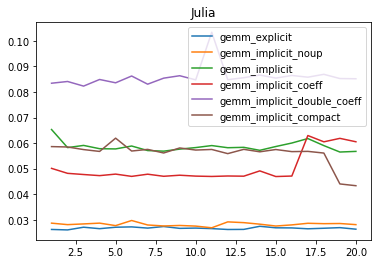

In [19]:
fig, ax = plt.subplots()
cols_to_use = [i for i in range(1, 21)]
keywords = ['gemm_explicit', 'gemm_implicit_noup', 'gemm_implicit', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff', 'gemm_implicit_compact']
for key in keywords:
    df_j_t[df_j_t[0] == key].loc[:, cols_to_use].transpose().plot(ax=ax)
ax.legend(keywords)
ax.set_title('Julia')

Text(0.5, 1.0, 'Eigen')

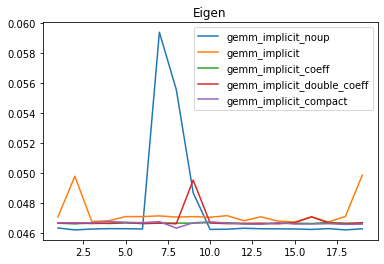

In [26]:
fig, ax = plt.subplots()
cols_to_use = [i for i in range(1, 20)]
keywords = ['gemm_implicit_noup', 'gemm_implicit', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff', 'gemm_implicit_compact']
for key in keywords:
    df_cppe_t[df_cppe_t[0] == key].loc[:, cols_to_use].transpose().plot(ax=ax)
ax.legend(keywords)
ax.set_title('Eigen')
# ax.set_ylim([0.26, 0.40])

Text(0.5, 1.0, 'Armadillo')

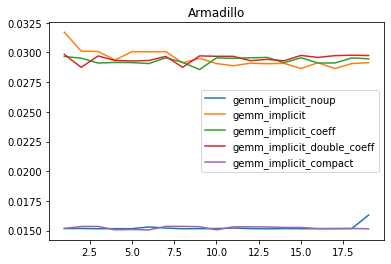

In [25]:
fig, ax = plt.subplots()
cols_to_use = [i for i in range(1, 20)]
keywords = ['gemm_implicit_noup', 'gemm_implicit', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff', 'gemm_implicit_compact']
for key in keywords:
    df_cppa_t[df_cppa_t[0] == key].loc[:, cols_to_use].transpose().plot(ax=ax)
ax.legend(keywords)
ax.set_title('Armadillo')
# ax.set_ylim([0.26, 0.30])

gemm_implicit
gemm_implicit_coeff
gemm_implicit_double_coeff


Text(0.5, 1.0, 'R')

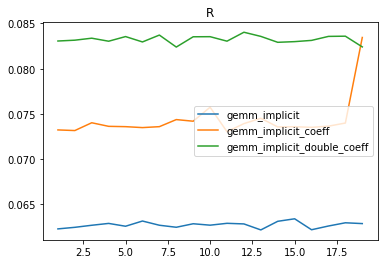

In [22]:
fig, ax = plt.subplots()
cols_to_use = [i for i in range(1, 20)]
keywords = ['gemm_implicit', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff']
for key in keywords:
    print(key)
    df_r_t[df_r_t[0] == key].loc[:, cols_to_use].transpose().plot(ax=ax)
ax.legend(keywords)
ax.set_title('R')

Text(0.5, 1.0, 'Python')

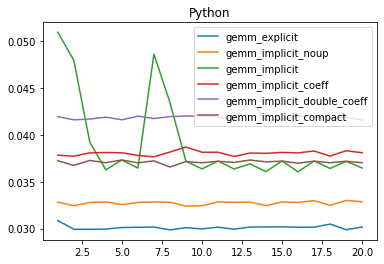

In [23]:
fig, ax = plt.subplots()
cols_to_use = [i for i in range(1, 21)]
keywords = ['gemm_explicit', 'gemm_implicit_noup', 'gemm_implicit', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff', 'gemm_implicit_compact']
for key in keywords:
    df_py_t[df_py_t[0] == key].loc[:, cols_to_use].transpose().plot(ax=ax)
ax.legend(keywords)
ax.set_title('Python')

Text(0.5, 1.0, 'Matlab')

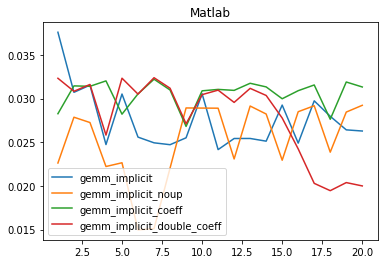

In [24]:
fig, ax = plt.subplots()
cols_to_use = [i for i in range(1, 21)]
keywords = ['gemm_implicit', 'gemm_implicit_noup', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff']
for key in keywords:
    df_m_t[df_m_t[0] == key].loc[:, cols_to_use].transpose().plot(ax=ax)
ax.legend(keywords)
ax.set_title('Matlab')

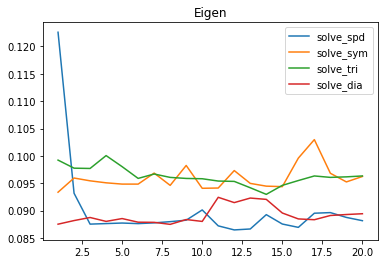

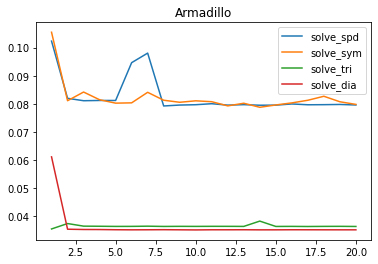

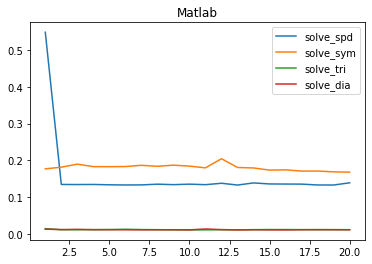

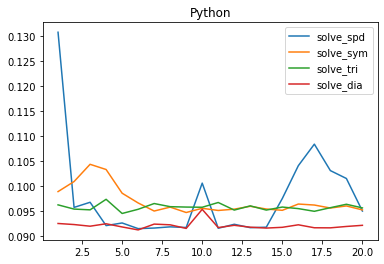

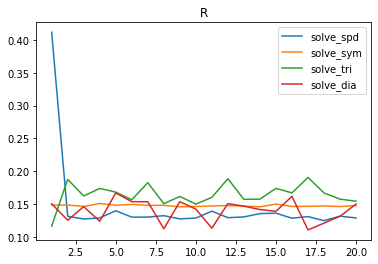

In [32]:
ddf_l = [df_cppe_t, df_cppa_t, df_m_t, df_py_t, df_r_t]
name = ['Eigen', 'Armadillo', 'Matlab', 'Python', 'R']
for i, ddf in enumerate(ddf_l):
    fig, ax = plt.subplots()
    cols_to_use = [i for i in range(1, 21)]
    keywords = ['solve_spd', 'solve_sym', 'solve_tri', 'solve_dia']
    for key in keywords:
        ddf[ddf[0] == key].loc[:, cols_to_use].transpose().plot(ax=ax)
    ax.legend(keywords)
    ax.set_title(name[i])